In [171]:
import pvlib
import math

In [172]:
from pvlib.location import Location

In [173]:
A = Location(51.45, 46.75, tz='Europe/Saratov', altitude=38, name='Saratov')

In [174]:
A

Location: 
  name: Saratov
  latitude: 51.45
  longitude: 46.75
  altitude: 38
  tz: Europe/Saratov

In [175]:
import pandas as pd
import datetime
times = pd.date_range(start=datetime.datetime(2022,1,1), end=datetime.datetime(2023,1,1), freq='1H')

In [176]:
times

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-31 15:00:00', '2022-12-31 16:00:00',
               '2022-12-31 17:00:00', '2022-12-31 18:00:00',
               '2022-12-31 19:00:00', '2022-12-31 20:00:00',
               '2022-12-31 21:00:00', '2022-12-31 22:00:00',
               '2022-12-31 23:00:00', '2023-01-01 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

In [177]:
times_loc = times.tz_localize(A.pytz)

In [178]:
times_loc

DatetimeIndex(['2022-01-01 00:00:00+04:00', '2022-01-01 01:00:00+04:00',
               '2022-01-01 02:00:00+04:00', '2022-01-01 03:00:00+04:00',
               '2022-01-01 04:00:00+04:00', '2022-01-01 05:00:00+04:00',
               '2022-01-01 06:00:00+04:00', '2022-01-01 07:00:00+04:00',
               '2022-01-01 08:00:00+04:00', '2022-01-01 09:00:00+04:00',
               ...
               '2022-12-31 15:00:00+04:00', '2022-12-31 16:00:00+04:00',
               '2022-12-31 17:00:00+04:00', '2022-12-31 18:00:00+04:00',
               '2022-12-31 19:00:00+04:00', '2022-12-31 20:00:00+04:00',
               '2022-12-31 21:00:00+04:00', '2022-12-31 22:00:00+04:00',
               '2022-12-31 23:00:00+04:00', '2023-01-01 00:00:00+04:00'],
              dtype='datetime64[ns, Europe/Saratov]', length=8761, freq=None)

In [179]:
SPA = pvlib.solarposition.spa_python(times_loc, A.latitude, A.longitude)

In [180]:
SPA

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2022-01-01 00:00:00+04:00,149.581674,149.581674,-59.581674,-59.581674,333.805930,-3.218705
2022-01-01 01:00:00+04:00,151.572043,151.572043,-61.572043,-61.572043,1.816458,-3.238519
2022-01-01 02:00:00+04:00,149.029197,149.029197,-59.029197,-59.029197,29.404583,-3.258324
2022-01-01 03:00:00+04:00,142.928507,142.928507,-52.928507,-52.928507,51.693114,-3.278121
2022-01-01 04:00:00+04:00,134.815763,134.815763,-44.815763,-44.815763,68.761367,-3.297910
...,...,...,...,...,...,...
2022-12-31 20:00:00+04:00,117.671422,117.671422,-27.671422,-27.671422,267.027680,-3.029234
2022-12-31 21:00:00+04:00,126.984145,126.984145,-36.984145,-36.984145,279.099514,-3.049037
2022-12-31 22:00:00+04:00,135.946313,135.946313,-45.946313,-45.946313,293.149799,-3.068831
2022-12-31 23:00:00+04:00,143.872442,143.872442,-53.872442,-53.872442,310.788314,-3.088616


In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Положение Солнца на небе')

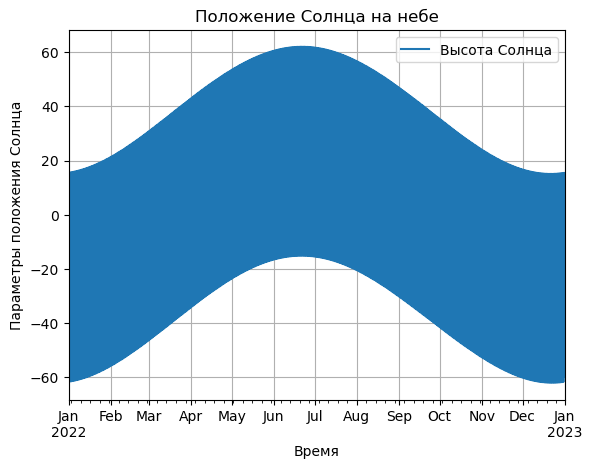

In [182]:
SPA['elevation'].plot(label='Высота Солнца')
plt.grid()
plt.legend()
plt.ylabel('Параметры положения Солнца')
plt.xlabel('Время')
plt.title('Положение Солнца на небе')

Text(0.5, 1.0, 'Положение Солнца на небе')

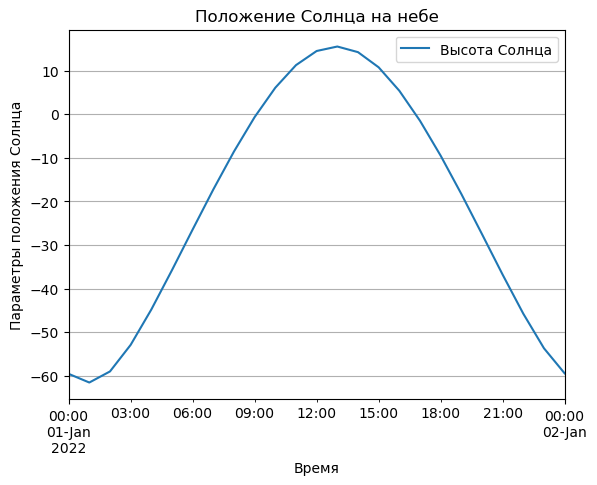

In [183]:
slice = []
for i in range (0,25):
    slice.append(i)
SPA.iloc[slice]['elevation'].plot(label='Высота Солнца')
plt.grid()
plt.legend()
plt.ylabel('Параметры положения Солнца')
plt.xlabel('Время')
plt.title('Положение Солнца на небе')

Text(0.5, 1.0, 'Положение Солнца на небе')

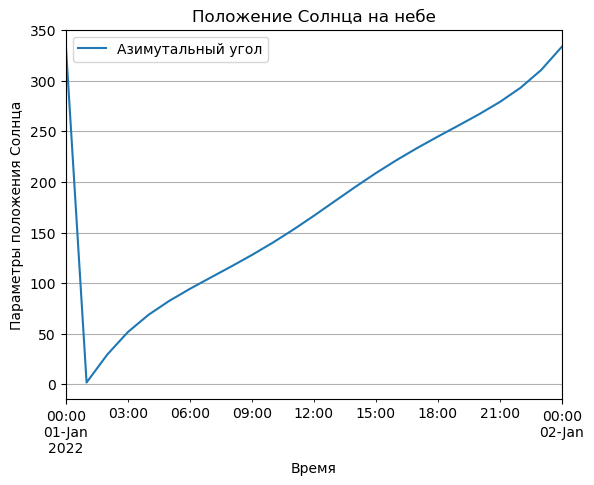

In [184]:
SPA.iloc[slice]['azimuth'].plot(label='Азимутальный угол')
plt.grid()
plt.legend()
plt.ylabel('Параметры положения Солнца')
plt.xlabel('Время')
plt.title('Положение Солнца на небе')

<AxesSubplot:>

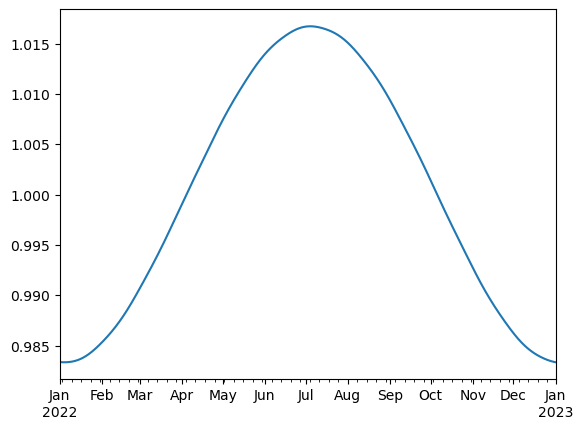

In [185]:
SunDistance = pvlib.solarposition.nrel_earthsun_distance(times_loc, how='numpy', delta_t=67.0, numthreads=4)
SunDistance.plot()

<AxesSubplot:>

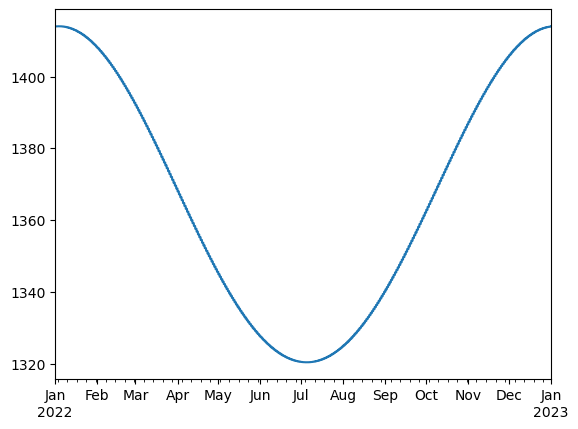

In [186]:
DNI_extra_Spencer = pvlib.irradiance.get_extra_radiation(times_loc, method='spencer')
DNI_extra_Spencer.plot()

In [187]:
DNI_extra_asce = pvlib.irradiance.get_extra_radiation(times_loc, method='asce')

In [188]:
DNI_extra_Spencer2 = pvlib.irradiance.get_extra_radiation(times_loc, method='spencer', epoch_year=2014, kwargs=SunDistance)
DNI_extra_Spencer2

2022-01-01 00:00:00+04:00    1413.981805
2022-01-01 01:00:00+04:00    1413.981805
2022-01-01 02:00:00+04:00    1413.981805
2022-01-01 03:00:00+04:00    1413.981805
2022-01-01 04:00:00+04:00    1413.981805
                                ...     
2022-12-31 20:00:00+04:00    1413.940576
2022-12-31 21:00:00+04:00    1413.940576
2022-12-31 22:00:00+04:00    1413.940576
2022-12-31 23:00:00+04:00    1413.940576
2023-01-01 00:00:00+04:00    1413.981805
Length: 8761, dtype: float64

In [189]:
DNI_extra_nrel = pvlib.irradiance.get_extra_radiation(times_loc, method='nrel')
DNI_extra_nrel

2022-01-01 00:00:00+04:00    1412.735271
2022-01-01 01:00:00+04:00    1412.736742
2022-01-01 02:00:00+04:00    1412.738195
2022-01-01 03:00:00+04:00    1412.739629
2022-01-01 04:00:00+04:00    1412.741045
                                ...     
2022-12-31 20:00:00+04:00    1412.769344
2022-12-31 21:00:00+04:00    1412.772203
2022-12-31 22:00:00+04:00    1412.775034
2022-12-31 23:00:00+04:00    1412.777837
2023-01-01 00:00:00+04:00    1412.780613
Length: 8761, dtype: float64

Text(0.5, 0, 'Время')

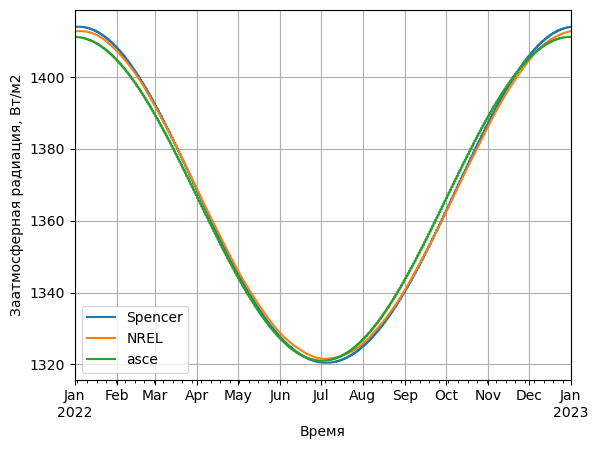

In [190]:
DNI_extra_Spencer.plot(label='Spencer')
DNI_extra_nrel.plot(label='NREL')
DNI_extra_asce.plot(label='asce')
plt.grid()
plt.legend()
plt.ylabel('Заатмосферная радиация, Вт/м2')
plt.xlabel('Время')

In [191]:
DNI_extra = DNI_extra_nrel

In [192]:
apparent_elevation = SPA['apparent_elevation']
VerySimpleClearSky = pvlib.clearsky.simplified_solis(apparent_elevation, aod700=0.1, precipitable_water=1.0, pressure=101711, dni_extra = DNI_extra)


In [193]:
VerySimpleClearSky

,ghi,dni,dhi
2022-01-01 00:00:00+04:00,0.0,0.0,0.0
2022-01-01 01:00:00+04:00,0.0,0.0,0.0
2022-01-01 02:00:00+04:00,0.0,0.0,0.0
2022-01-01 03:00:00+04:00,0.0,0.0,0.0
2022-01-01 04:00:00+04:00,0.0,0.0,0.0
...,...,...,...
2022-12-31 20:00:00+04:00,0.0,0.0,0.0
2022-12-31 21:00:00+04:00,0.0,0.0,0.0
2022-12-31 22:00:00+04:00,0.0,0.0,0.0
2022-12-31 23:00:00+04:00,0.0,0.0,0.0


Text(0.5, 0, 'Время')

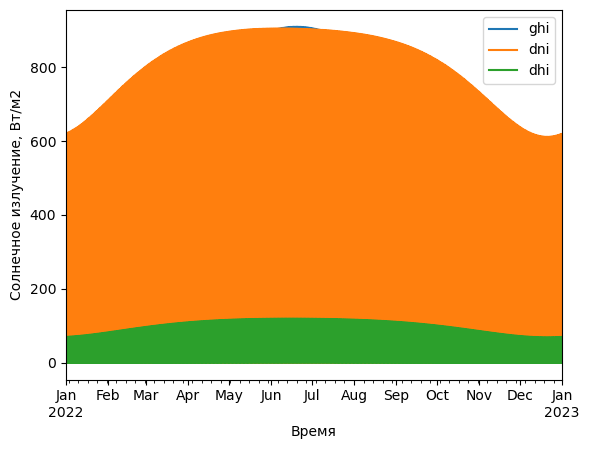

In [194]:
VerySimpleClearSky.plot()
plt.legend()
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')

<AxesSubplot:>

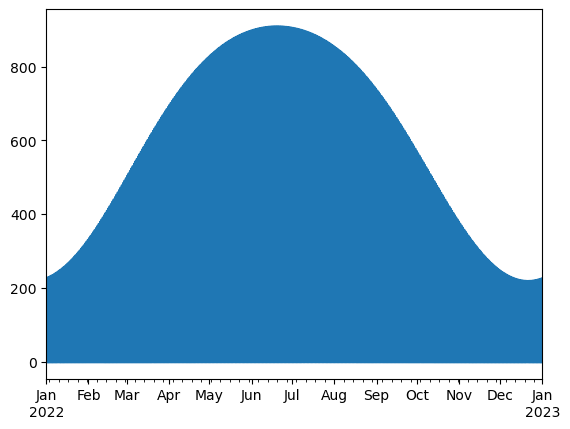

In [195]:
VerySimpleClearSky['ghi'].plot()

In [196]:
apparent_zenith = SPA['apparent_zenith']
zenith = SPA['zenith']
airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith, model='simple')
airmass_absolute = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101711)

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times_loc, A.latitude, A.longitude, filepath=None, interp_turbidity=True)

SimpleClearSky = pvlib.clearsky.ineichen(apparent_zenith, airmass_absolute, linke_turbidity, altitude=A.altitude, dni_extra=DNI_extra, perez_enhancement=False)

In [197]:
SimpleClearSky

,ghi,dni,dhi
2022-01-01 00:00:00+04:00,0.0,0.0,0.0
2022-01-01 01:00:00+04:00,0.0,0.0,0.0
2022-01-01 02:00:00+04:00,0.0,0.0,0.0
2022-01-01 03:00:00+04:00,0.0,0.0,0.0
2022-01-01 04:00:00+04:00,0.0,0.0,0.0
...,...,...,...
2022-12-31 20:00:00+04:00,0.0,0.0,0.0
2022-12-31 21:00:00+04:00,0.0,0.0,0.0
2022-12-31 22:00:00+04:00,0.0,0.0,0.0
2022-12-31 23:00:00+04:00,0.0,0.0,0.0


Text(0.5, 0, 'Время')

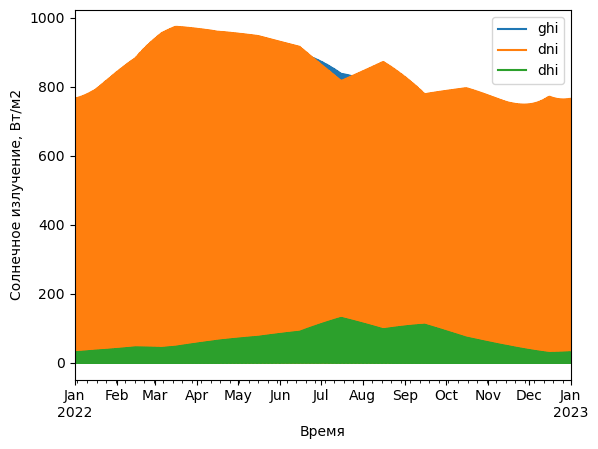

In [198]:
SimpleClearSky.plot()
plt.legend()
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')

Text(0.5, 0, 'Время')

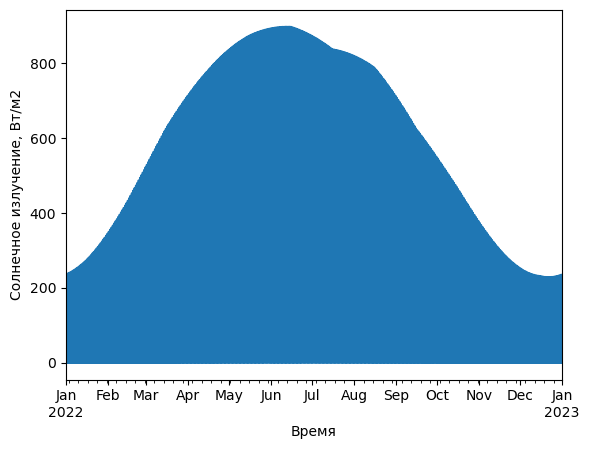

In [199]:
SimpleClearSky['ghi'].plot()
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')


In [200]:
Haurwitz = A.get_clearsky(times_loc, model='haurwitz', solar_position=SPA, dni_extra=DNI_extra)

<AxesSubplot:>

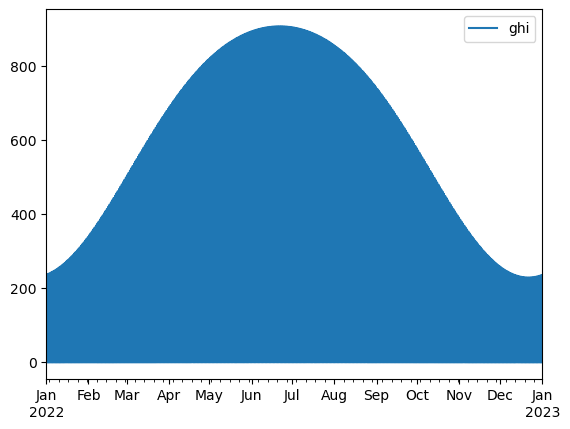

In [201]:
Haurwitz.plot()

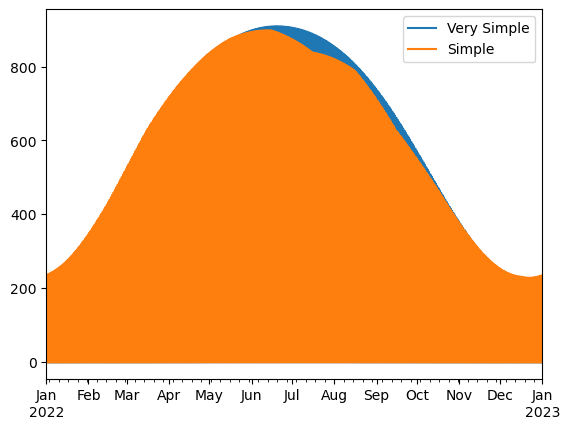

In [202]:
VerySimpleClearSky['ghi'].plot(label = 'Very Simple')
SimpleClearSky['ghi'].plot(label = 'Simple')
plt.legend()

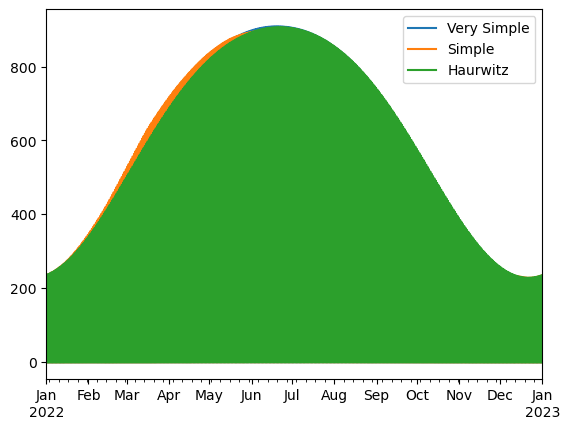

In [203]:
VerySimpleClearSky['ghi'].plot(label = 'Very Simple')
SimpleClearSky['ghi'].plot(label = 'Simple')
Haurwitz['ghi'].plot(label = 'Haurwitz')
plt.legend()

<AxesSubplot:>

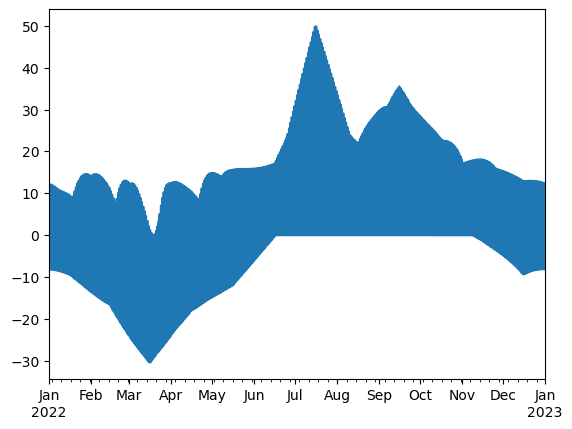

In [204]:
e = VerySimpleClearSky['ghi'] - SimpleClearSky['ghi']
e.plot()


In [205]:
surf_tilt = 45
DiffuseSky_isotropic = pvlib.irradiance.isotropic(surf_tilt, SimpleClearSky['dhi'])
DiffuseSky_isotropic

2022-01-01 00:00:00+04:00    0.0
2022-01-01 01:00:00+04:00    0.0
2022-01-01 02:00:00+04:00    0.0
2022-01-01 03:00:00+04:00    0.0
2022-01-01 04:00:00+04:00    0.0
                            ... 
2022-12-31 20:00:00+04:00    0.0
2022-12-31 21:00:00+04:00    0.0
2022-12-31 22:00:00+04:00    0.0
2022-12-31 23:00:00+04:00    0.0
2023-01-01 00:00:00+04:00    0.0
Name: dhi, Length: 8761, dtype: float64

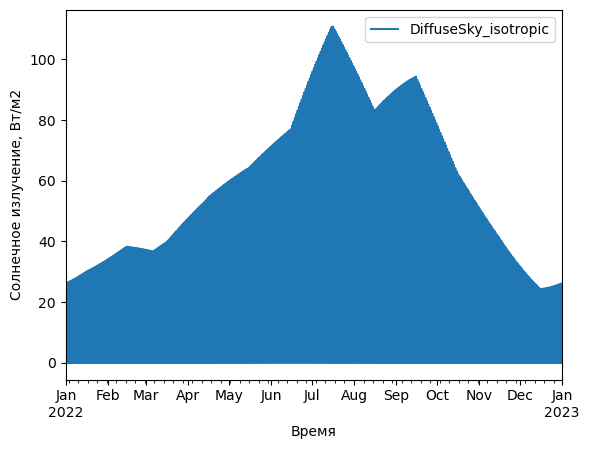

In [206]:
DiffuseSky_isotropic.plot(label='DiffuseSky_isotropic')
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')
plt.legend()

<AxesSubplot:>

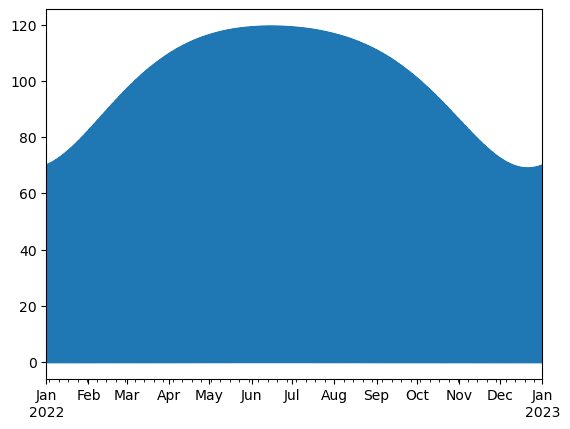

In [207]:
VerySimpleClearSky['dhi'].plot()

<AxesSubplot:>

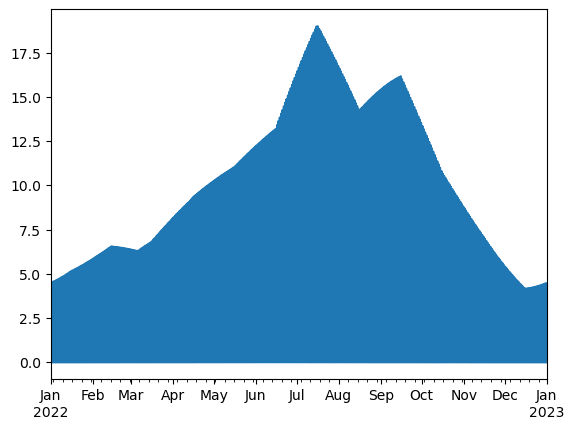

In [208]:
dif = SimpleClearSky['dhi'] - DiffuseSky_isotropic 
dif.plot()


In [209]:
surf_az = 180
DiffuseSky_Perez = pvlib.irradiance.perez(surf_tilt, surf_az, SimpleClearSky['dhi'], SimpleClearSky['dni'], DNI_extra, SPA['apparent_zenith'], SPA['azimuth'], airmass_relative, model='allsitescomposite1990', return_components=False)


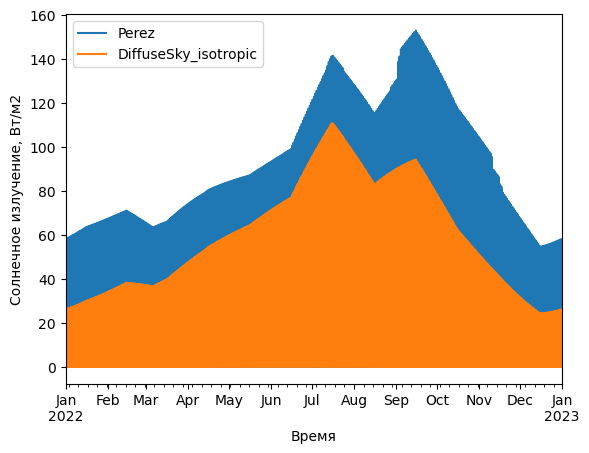

In [210]:
DiffuseSky_Perez.plot(label='Perez')
DiffuseSky_isotropic.plot(label='DiffuseSky_isotropic')
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')
plt.legend()

In [211]:
DiffuseSky_Haydavies = pvlib.irradiance.haydavies(surf_tilt, surf_az, SimpleClearSky['dhi'], SimpleClearSky['dni'], DNI_extra, solar_zenith=SPA['apparent_zenith'], solar_azimuth=SPA['azimuth'], projection_ratio=None)

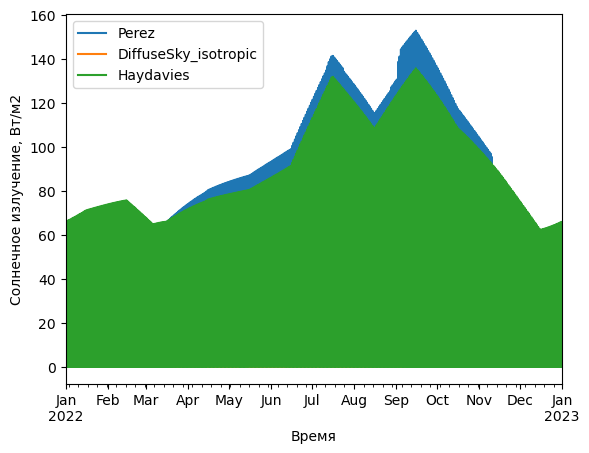

In [212]:
DiffuseSky_Perez.plot(label='Perez')
DiffuseSky_isotropic.plot(label='DiffuseSky_isotropic')
DiffuseSky_Haydavies.plot(label='Haydavies')
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')
plt.legend()

In [213]:
DiffuseGround = pvlib.irradiance.get_ground_diffuse(surf_tilt, SimpleClearSky['ghi'], albedo=0.36, surface_type=None)

Text(0.5, 0, 'Время')

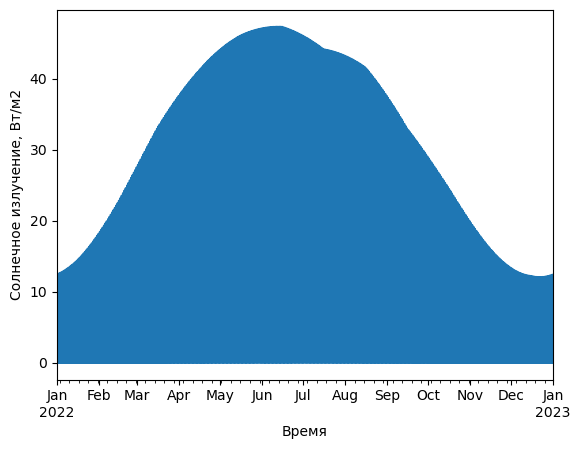

In [214]:
DiffuseGround.plot()
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')

In [215]:
surf_tilt = 50
AOI = pvlib.irradiance.aoi(surf_tilt, surf_az, SPA['zenith'], SPA['azimuth'])

Text(0.5, 0, 'Время')

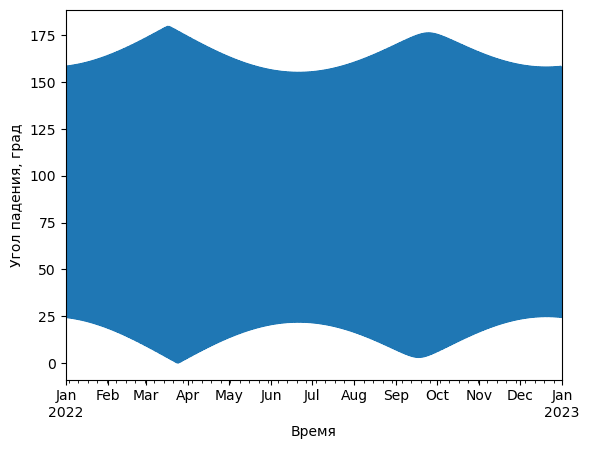

In [216]:
AOI.plot()
plt.ylabel('Угол падения, град')
plt.xlabel('Время')

In [217]:
G = pvlib.irradiance.poa_components(AOI, SimpleClearSky['dni'], DiffuseSky_Haydavies, DiffuseGround)

Text(0.5, 0, 'Время')

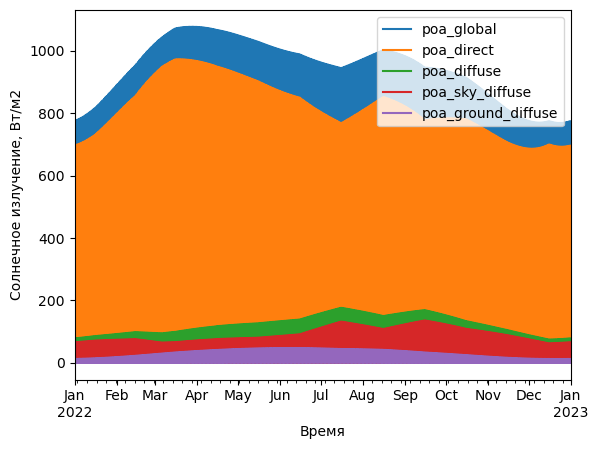

In [218]:
G.plot()
plt.ylabel('Cолнечное излучение, Вт/м2')
plt.xlabel('Время')

In [219]:
G

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2022-01-01 00:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
2022-01-01 01:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
2022-01-01 02:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
2022-01-01 03:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
2022-01-01 04:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...
2022-12-31 20:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
2022-12-31 21:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
2022-12-31 22:00:00+04:00,0.0,-0.0,0.0,0.0,0.0
2022-12-31 23:00:00+04:00,0.0,-0.0,0.0,0.0,0.0


In [220]:

Gmax = []
i = 0
for surf_tilt in range(0,91,1):
    DiffuseSky_Haydavies = pvlib.irradiance.haydavies(surf_tilt, surf_az, SimpleClearSky['dhi'], SimpleClearSky['dni'], DNI_extra, solar_zenith=SPA['apparent_zenith'], solar_azimuth=SPA['azimuth'], projection_ratio=None)
    DiffuseGround = pvlib.irradiance.get_ground_diffuse(surf_tilt, SimpleClearSky['ghi'], albedo=0.37, surface_type=None)
    AOI = pvlib.irradiance.aoi(surf_tilt, surf_az, SPA['zenith'], SPA['azimuth'])
    G = pvlib.irradiance.poa_components(AOI, SimpleClearSky['dni'], DiffuseSky_Haydavies, DiffuseGround)
    Gsum = G['poa_global'].sum()
    Gmax.append(Gsum)
    if Gmax[i] > Gmax[i-1]:
        ST = surf_tilt
    print(surf_tilt, ' ', Gsum/1000, 'кВтч/кв.м')
    i += 1
print('Оптимальный угол установки солнечных модулей:', ST)

0   1667.1056833916691 кВтч/кв.м
1   1692.8197734545124 кВтч/кв.м
2   1718.1276408886542 кВтч/кв.м
3   1743.021671037306 кВтч/кв.м
4   1767.4957260936667 кВтч/кв.м
5   1791.5423193121737 кВтч/кв.м
6   1815.153159859887 кВтч/кв.м
7   1838.321644801243 кВтч/кв.м
8   1861.041582015208 кВтч/кв.м
9   1883.3073732163732 кВтч/кв.м
10   1905.1134964677742 кВтч/кв.м
11   1926.455258753345 кВтч/кв.м
12   1947.3282055822656 кВтч/кв.м
13   1967.7283702391946 кВтч/кв.м
14   1987.652351553794 кВтч/кв.м
15   2007.09755454146 кВтч/кв.м
16   2026.0621358854903 кВтч/кв.м
17   2044.5459173841311 кВтч/кв.м
18   2062.551380086147 кВтч/кв.м
19   2080.092433040122 кВтч/кв.м
20   2097.1702740375954 кВтч/кв.м
21   2113.739070788358 кВтч/кв.м
22   2129.8009631960035 кВтч/кв.м
23   2145.366940792253 кВтч/кв.м
24   2160.474485394668 кВтч/кв.м
25   2175.0505045237746 кВтч/кв.м
26   2189.0734069008645 кВтч/кв.м
27   2202.538928152405 кВтч/кв.м
28   2215.442963164861 кВтч/кв.м
29   2227.7815858869612 кВтч/кв.м
30   

In [221]:
Gsum/1000

1909.4408100712324

In [222]:
PV_modules_CEC = pvlib.pvsystem.retrieve_sam(path='CEC_Modules.csv')

/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2418: UserWarning: Original names contain 2 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2422: UserWarning: Normalized names contain 9 duplicate(s).
  warnings.warn(


In [223]:
PV_modules_CEC

,A10Green_Technology_A10J_S72_175,A10Green_Technology_A10J_S72_180,A10Green_Technology_A10J_S72_185,A10Green_Technology_A10J_M60_220,A10Green_Technology_A10J_M60_225,A10Green_Technology_A10J_M60_230,A10Green_Technology_A10J_M60_235,A10Green_Technology_A10J_M60_240,A2Peak_Power_POWER_ON_P220_6x10,Aavid_Solar_ASMS_165P,...,Zytech_Solar_ZT275P,Zytech_Solar_ZT280P,Zytech_Solar_ZT285P,Zytech_Solar_ZT290P,Zytech_Solar_ZT295P,Zytech_Solar_ZT300P,Zytech_Solar_ZT305P,Zytech_Solar_ZT310P,Zytech_Solar_ZT315P,Zytech_Solar_ZT320P
Manufacturer,A10Green Technology,A10Green Technology,A10Green Technology,A10Green Technology,A10Green Technology,A10Green Technology,A10Green Technology,A10Green Technology,A2Peak Power,Aavid Solar,...,Zytech Solar,Zytech Solar,Zytech Solar,Zytech Solar,Zytech Solar,Zytech Solar,Zytech Solar,Zytech Solar,Zytech Solar,Zytech Solar
Technology,Mono-c-Si,Mono-c-Si,Mono-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,...,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si,Multi-c-Si
Bifacial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STC,175.0914,179.928,184.7016,219.876,224.9856,230.1288,235.008,240.5376,219.978,164.85,...,275.0144,280.3294,285.326,290.0358,295.0656,300.0032,305.0564,310.1436,315.0936,320.42
PTC,151.2,155.7,160.2,189.1,193.5,204.1,208.7,213.3,195.0,146.3,...,248.0,252.6,257.3,261.9,266.5,271.2,275.8,280.5,285.1,289.8
A_c,1.3,1.3,1.3,1.624,1.624,1.624,1.624,1.624,1.633,1.301,...,1.931,1.931,1.931,1.931,1.931,1.931,1.931,1.931,1.931,1.931
Length,1.576,1.576,1.576,1.632,1.632,1.632,1.632,1.632,1.633,1.575,...,1.95,1.95,1.95,1.95,1.95,1.95,1.95,1.95,1.95,1.95
Width,0.825,0.825,0.825,0.995,0.995,0.995,0.995,0.995,1.0,0.826,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
N_s,72,72,72,60,60,60,60,60,60,72,...,72,72,72,72,72,72,72,72,72,72
I_sc_ref,5.17,5.31,5.43,7.95,8.04,8.1,8.23,8.32,7.98,5.25,...,8.31,8.4,8.48,8.55,8.64,8.71,8.87,8.9,9.01,9.12


In [224]:
effective_irradiance = G['poa_global'] * 0.97
effective_irradiance

2022-01-01 00:00:00+04:00    0.0
2022-01-01 01:00:00+04:00    0.0
2022-01-01 02:00:00+04:00    0.0
2022-01-01 03:00:00+04:00    0.0
2022-01-01 04:00:00+04:00    0.0
                            ... 
2022-12-31 20:00:00+04:00    0.0
2022-12-31 21:00:00+04:00    0.0
2022-12-31 22:00:00+04:00    0.0
2022-12-31 23:00:00+04:00    0.0
2023-01-01 00:00:00+04:00    0.0
Name: poa_global, Length: 8761, dtype: float64

In [225]:
archive = pd.read_csv('WRco.csv',sep=';',header=0)
archive

,Hour,WS,Ta
0,1,2.75,-12.74
1,2,2.74,-12.60
2,3,2.71,-12.59
3,4,2.67,-12.68
4,5,2.60,-12.82
...,...,...,...
8756,8757,2.42,-11.67
8757,8758,2.17,-11.35
8758,8759,2.00,-11.00
8759,8760,1.95,-10.99


Text(0.5, 0, 'Время')

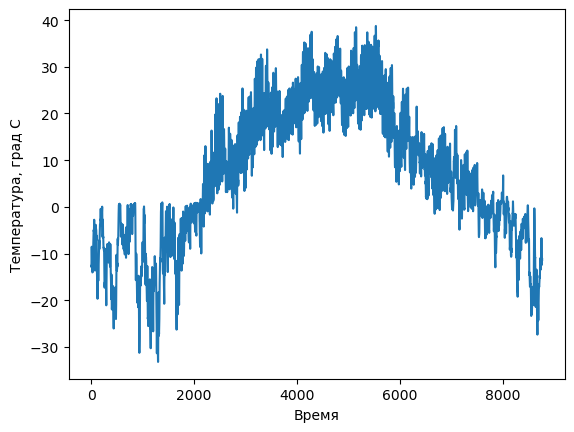

In [226]:
archive['Ta'].plot()
plt.ylabel('Температура, град C')
plt.xlabel('Время')

In [227]:
a = -3.47
b = -0.0594
deltaT = 3
temp_air = archive['Ta'].values
wind_speed = archive['WS'].values
Cell_temperature = pvlib.temperature.sapm_cell(G['poa_global'], temp_air, wind_speed, a, b, deltaT, irrad_ref=1000.0)

In [228]:
Cell_temperature

2022-01-01 00:00:00+04:00   -12.74
2022-01-01 01:00:00+04:00   -12.60
2022-01-01 02:00:00+04:00   -12.59
2022-01-01 03:00:00+04:00   -12.68
2022-01-01 04:00:00+04:00   -12.82
                             ...  
2022-12-31 20:00:00+04:00   -11.67
2022-12-31 21:00:00+04:00   -11.35
2022-12-31 22:00:00+04:00   -11.00
2022-12-31 23:00:00+04:00   -10.99
2023-01-01 00:00:00+04:00   -11.39
Name: poa_global, Length: 8761, dtype: float64

In [229]:
Diff_temp = Cell_temperature.values - temp_air
Diff_temp.max()

30.112100591412695

Text(0, 0.5, 'Температура')

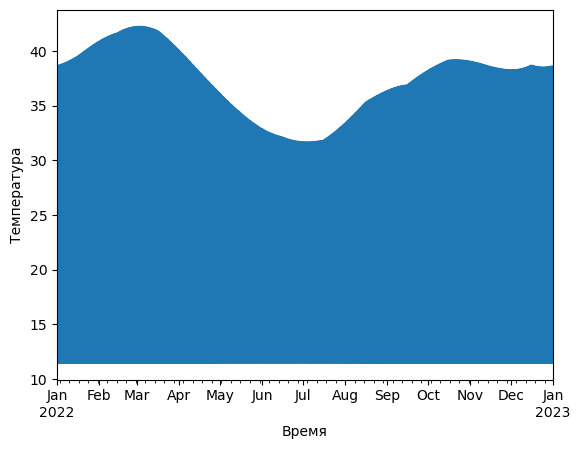

In [230]:
# Данные о температуре окружающего воздуха и скорости ветра
temp_air = +11.5
wind_speed = 1.2

# Определение эмперических коэффициентов по таблице, представленной здесь:
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.temperature.sapm_cell.html
a = -3.47
b = -0.0594
deltaT = 3

# Расчёт температуры ячейки
Cells_temperature = pvlib.temperature.sapm_cell(G['poa_global'], temp_air, wind_speed, a, b, deltaT, irrad_ref=1000)
Cells_temperature.plot()
plt.xlabel('Время')
plt.ylabel('Температура')

In [231]:
a = -3.47
b = -0.0594
deltaT = 3
temp_air = +11.5
wind_speed = 1.2
Cell_temperature = pvlib.temperature.sapm_cell(G['poa_global'], temp_air, wind_speed, a, b, deltaT, irrad_ref=1000.0)

In [232]:
Cell_temperature

2022-01-01 00:00:00+04:00    11.5
2022-01-01 01:00:00+04:00    11.5
2022-01-01 02:00:00+04:00    11.5
2022-01-01 03:00:00+04:00    11.5
2022-01-01 04:00:00+04:00    11.5
                             ... 
2022-12-31 20:00:00+04:00    11.5
2022-12-31 21:00:00+04:00    11.5
2022-12-31 22:00:00+04:00    11.5
2022-12-31 23:00:00+04:00    11.5
2023-01-01 00:00:00+04:00    11.5
Name: poa_global, Length: 8761, dtype: float64

In [233]:
Diff_temp = Cell_temperature.values - temp_air
Diff_temp.max()

30.729132265798953

In [234]:
Diff_temp.mean()

6.969145935990971

Text(0.5, 0, 'Время')

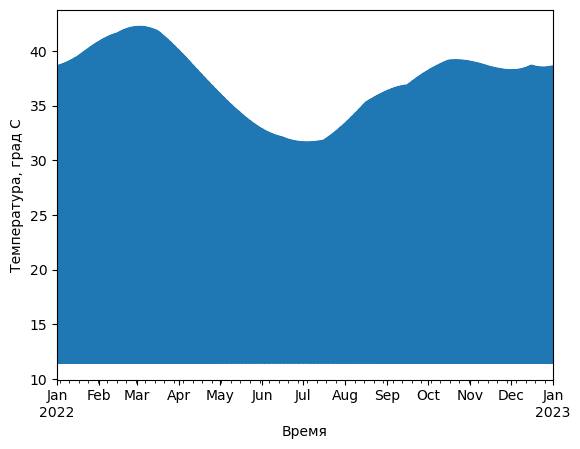

In [235]:
Cell_temperature.plot(label = 'Температура СМ')
plt.ylabel('Температура, град C')
plt.xlabel('Время')


In [236]:
tech = 'Mono-c-Si'
STC_min = 380
STC_max = 395

PVsearch = PV_modules_CEC.transpose()
PVsearch = PVsearch[(PVsearch['STC'] >= STC_min) & (PVsearch['STC'] <= STC_max)  & (PVsearch['Bifacial'] == 0) ]
PV_modules_CEC2 = PVsearch.transpose()
PV_modules_CEC2


,Aptos_Solar_Technology_LLC_DNA_144_MF23_390W__Blk_,Aptos_Solar_Technology_LLC_DNA_144_MF23_390W__Wht_,Auxin_Solar_AXN6M612T380,Auxin_Solar_AXN6M612T385,AXITEC_AC_380MH_144S,AXITEC_AC_380MH_144V,AXITEC_AC_385MH_144S,AXITEC_AC_385MH_144V,AXITEC_AC_390MH_144S,AXITEC_AC_390MH_144V,...,Wuxi_Suntech_Power_Co___Ltd_STP380S_A24U_Vfw,Wuxi_Suntech_Power_Co___Ltd_STP380S_A72U_Vfh,Wuxi_Suntech_Power_Co___Ltd_STP385S_A24U_Vfw,Wuxi_Suntech_Power_Co___Ltd_STP385S_A72U_Vfh,Wuxi_Suntech_Power_Co___Ltd_STP390S_A24U_Vfw,Wuxi_Suntech_Power_Co___Ltd_STP390S_A72U_Vfh,Yingli_Energy__China__YL380D_36b,Yingli_Energy__China__YL385D_36b,ZNSHINE_PV_TECH_Co___Ltd__ZXM6_72_380_M,ZNSHINE_PV_TECH_Co___Ltd__ZXM6_72_385_M
Manufacturer,Aptos Solar Technology LLC,Aptos Solar Technology LLC,Auxin Solar,Auxin Solar,AXITEC,AXITEC,AXITEC,AXITEC,AXITEC,AXITEC,...,Wuxi Suntech Power Co._ Ltd,Wuxi Suntech Power Co._ Ltd,Wuxi Suntech Power Co._ Ltd,Wuxi Suntech Power Co._ Ltd,Wuxi Suntech Power Co._ Ltd,Wuxi Suntech Power Co._ Ltd,Yingli Energy (China),Yingli Energy (China),ZNSHINE PV-TECH Co._ Ltd.,ZNSHINE PV-TECH Co._ Ltd.
Technology,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,...,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si,Mono-c-Si
Bifacial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STC,390.264,390.264,380.0544,385.1274,380.0,380.0,385.116,385.116,390.264,390.264,...,380.031,380.07,385.125,385.22,390.251,390.402,381.914,387.429,380.247,385.361
PTC,353.5,364.4,349.1,353.8,352.7,352.7,357.5,357.5,364.2,364.2,...,352.2,354.0,357.0,358.8,361.7,363.6,352.2,356.9,354.6,359.4
A_c,2.01,1.95,1.94,1.94,1.98,1.98,1.98,1.98,1.98,1.98,...,1.95,1.99,1.95,1.99,1.95,1.99,1.88,1.88,1.94,1.94
Length,NaN,NaN,1.956,1.956,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Width,NaN,NaN,0.992,0.992,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_s,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
I_sc_ref,10.48,10.48,10.35,10.45,10.01,10.01,10.08,10.08,10.48,10.48,...,10.04,10.19,10.11,10.26,10.18,10.33,10.15,10.24,10.03,10.1


In [247]:
PV_module1 = PV_modules_CEC['Aptos_Solar_Technology_LLC_DNA_144_MF23_390W__Blk_']
PV_module2 = PV_modules_CEC['AXITEC_AC_385MH_144S']
PV_module3 = PV_modules_CEC['ZNSHINE_PV_TECH_Co___Ltd__ZXM6_72_380_M']

In [248]:
PV_modules_CEC = pvlib.pvsystem.retrieve_sam(path='CEC_Modules.csv')
photocurrent1, saturation_current1, resistance_series1, resistance_shunt1, nNsVth1 = pvlib.pvsystem.calcparams_desoto(
    effective_irradiance,
    Cell_temperature,
    PV_module1['alpha_sc'],
    PV_module1['a_ref'],
    PV_module1['I_L_ref'],
    PV_module1['I_o_ref'],
    PV_module1['R_sh_ref'],
    PV_module1['R_s'],
    EgRef=1.121,
    dEgdT=- 0.0002677,
    irrad_ref=1000,
    temp_ref=25)

/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2418: UserWarning: Original names contain 2 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2422: UserWarning: Normalized names contain 9 duplicate(s).
  warnings.warn(


In [249]:
PV_modules_CEC = pvlib.pvsystem.retrieve_sam(path='CEC_Modules.csv')
photocurrent2, saturation_current2, resistance_series2, resistance_shunt2, nNsVth2 = pvlib.pvsystem.calcparams_desoto(
    effective_irradiance,
    Cell_temperature,
    PV_module2['alpha_sc'],
    PV_module2['a_ref'],
    PV_module2['I_L_ref'],
    PV_module2['I_o_ref'],
    PV_module2['R_sh_ref'],
    PV_module2['R_s'],
    EgRef=1.121,
    dEgdT=- 0.0002677,
    irrad_ref=1000,
    temp_ref=25)

/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2418: UserWarning: Original names contain 2 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2422: UserWarning: Normalized names contain 9 duplicate(s).
  warnings.warn(


In [250]:
PV_modules_CEC = pvlib.pvsystem.retrieve_sam(path='CEC_Modules.csv')
photocurrent3, saturation_current3, resistance_series3, resistance_shunt3, nNsVth3 = pvlib.pvsystem.calcparams_desoto(
    effective_irradiance,
    Cell_temperature,
    PV_module3['alpha_sc'],
    PV_module3['a_ref'],
    PV_module3['I_L_ref'],
    PV_module3['I_o_ref'],
    PV_module3['R_sh_ref'],
    PV_module3['R_s'],
    EgRef=1.121,
    dEgdT=- 0.0002677,
    irrad_ref=1000,
    temp_ref=25)

/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2418: UserWarning: Original names contain 2 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
/opt/anaconda3/lib/python3.9/site-packages/pvlib/pvsystem.py:2422: UserWarning: Normalized names contain 9 duplicate(s).
  warnings.warn(


In [251]:
DCout1 = pvlib.pvsystem.singlediode(photocurrent1, saturation_current1, resistance_series1, resistance_shunt1, nNsVth1, ivcurve_pnts=None, method='newton')


In [252]:
DCout2 = pvlib.pvsystem.singlediode(photocurrent2, saturation_current2, resistance_series2, resistance_shunt2, nNsVth2, ivcurve_pnts=None, method='newton')


In [253]:
DCout3 = pvlib.pvsystem.singlediode(photocurrent3, saturation_current3, resistance_series3, resistance_shunt3, nNsVth3, ivcurve_pnts=None, method='newton')


Text(0.5, 0, 'Время')

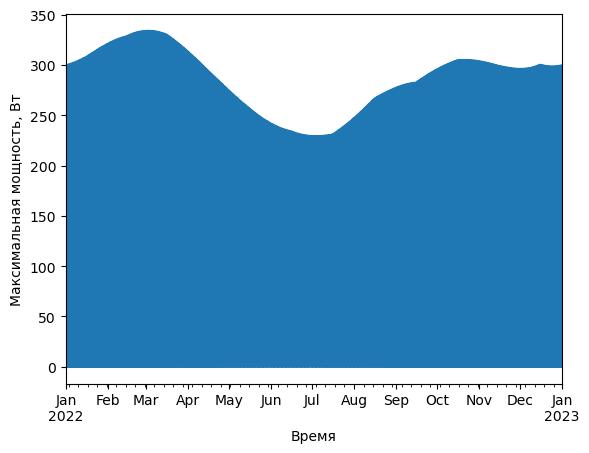

In [254]:
DCout3['p_mp'].plot()
plt.ylabel('Максимальная мощность, Вт')
plt.xlabel('Время')

<AxesSubplot:>

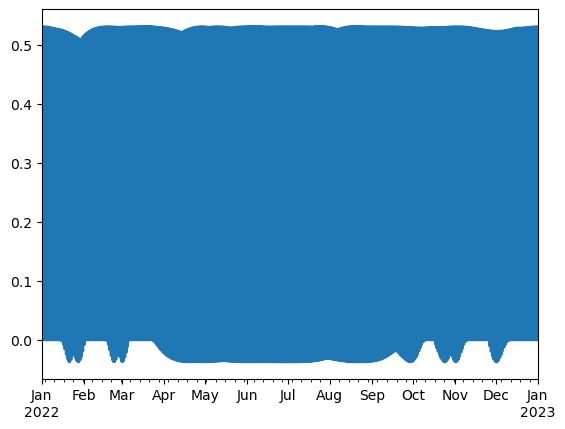

In [256]:
dif1 = DCout1['p_mp'] - DCout2['p_mp']
dif1.plot()


<AxesSubplot:>

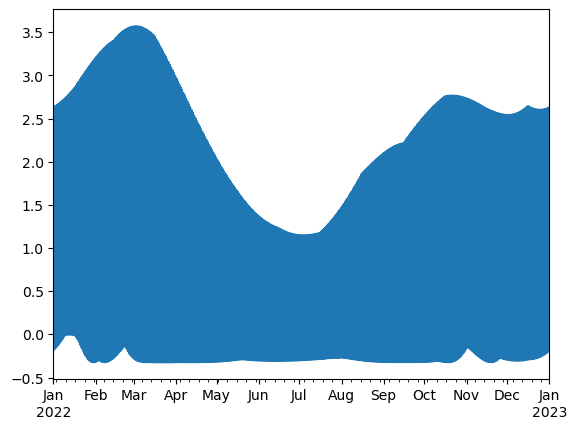

In [257]:
dif1 = DCout1['p_mp'] - DCout3['p_mp']
dif1.plot()


<AxesSubplot:>

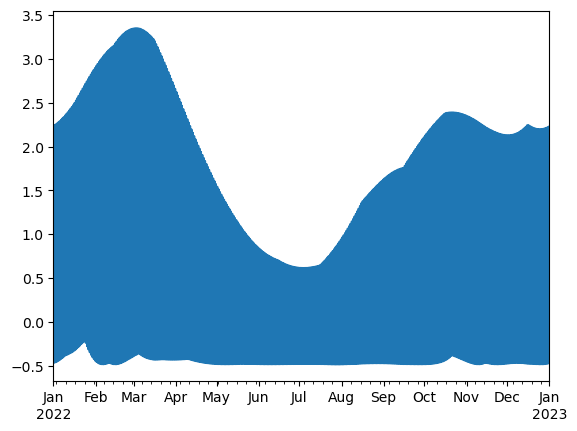

In [258]:
dif1 = DCout2['p_mp'] - DCout3['p_mp']
dif1.plot()

In [259]:
DCout4 = pvlib.pvsystem.max_power_point(photocurrent1, saturation_current1, resistance_series1, resistance_shunt1, nNsVth1, d2mutau=0, method='newton')


<AxesSubplot:>

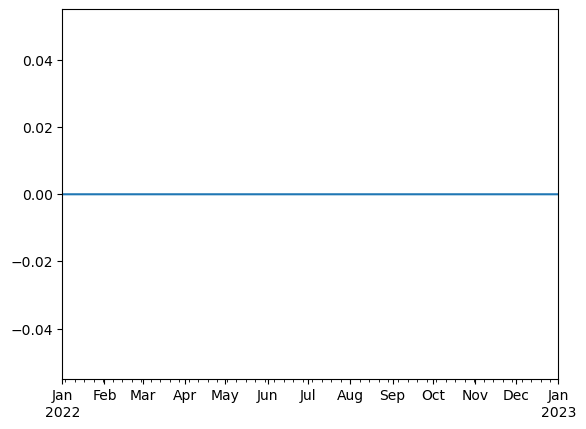

In [260]:
dif2 = DCout1['p_mp'] - DCout4['p_mp']
dif2.plot()


In [261]:
DCout = DCout3


In [262]:
Inverters = pvlib.pvsystem.retrieve_sam(path='CEC_Inverters.csv')


In [263]:
Inverters = pvlib.pvsystem.retrieve_sam(path='CEC_Inverters.csv')

Paco_min = 100000
Paco_max = 140000
Vac_min = 240
Vac_max = 800

INVsearch = Inverters.transpose()
INVsearch = INVsearch[(INVsearch['Paco'] >= Paco_min) & (INVsearch['Paco'] <= Paco_max) & (INVsearch['Vac'] >= Vac_min) & (INVsearch['Vac'] <= Vac_max)]
Inverters2 = INVsearch.transpose()
Inverters2


,CSI_Solar_Co___Ltd___CSI_100K_T480GL02_U__480V_,CSI_Solar_Co___Ltd___CSI_125K_T600GL02_U__600V_,CSI_Solar_Co___Ltd___CSI_125KTL_GS_E__600V_,Chint_Power_Systems_America__CPS_ECB125KTL_M_US_480__480V_,Chint_Power_Systems_America__CPS_SCH100KTL_AIO_US_600__600V_,Chint_Power_Systems_America__CPS_SCH100KTL_DO_US_480__480V_,Chint_Power_Systems_America__CPS_SCH100KTL_DO_US_600__600V_,Chint_Power_Systems_America__CPS_SCH125KTL_AIO_US_600__600V_,Chint_Power_Systems_America__CPS_SCH125KTL_DO_US_600__600V_,DYNAPOWER_COMPANY_LLC__MPS_125EHV__480V_,...,KACO_new_energy_GmbH__KACO_blueplanet_137_TL3_M1_WM_OD_IIP0__600V_,KACO_new_energy_GmbH__KACO_blueplanet_137_TL3_M1_WM_OD_IIPX__600V_,LS_Energy_Solutions_LLC__PBE_6140_R61_1A0_1000__600V_,Princeton_Power_Systems___Inc___GTIB_480_125XXXXXX_G1_5__480V_,Princeton_Power_Systems___Inc___GTIB_480_125XXXXXX_W_G1_5__480V_,SMA_America__SHP_125_US_20__480V_,Schneider_Electric_Solar_Inverters_USA___Inc___Conext_CL125__600V_,Sungrow_Power_Supply_Co___Ltd___SG125HV__600V_,Yaskawa_Solectria_Solar__XGI_1500_125_125__600V_,Yaskawa_Solectria_Solar__XGI_1500_125_150__600V_
Vac,480,600,600,480,600,480,600,600,600,480,...,600,600,600,480,480,480,600,600,600,600
Pso,117.287,145.212,40.582,268.672,135.723,139.0,115.217,148.671,142.988,631.529,...,107.102,107.102,350.048,1038.79,1412.99,135.94,97.8068,97.9892,212.913,236.865
Paco,100000.0,125083.0,125000.0,125188.0,100000.0,100000.0,100000.0,125000.0,125000.0,123458.0,...,138663.0,138663.0,139449.0,124964.0,124964.0,125000.0,125000.0,125000.0,125000.0,124618.0
Pdco,101782.0,127176.0,126734.0,128798.0,101581.0,102265.0,101613.0,127293.0,127274.0,126718.0,...,140510.0,140510.0,141900.0,129454.0,132204.0,127378.0,127418.0,127418.0,126773.0,126553.0
Vdco,720.0,1080.0,950.0,925.0,1000.0,1000.0,1000.0,1000.0,1000.0,1120.0,...,981.0,981.0,1125.0,710.0,710.0,830.0,945.0,945.0,1000.0,1050.0
C0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
C1,-0.000003,-0.000002,0.000012,0.00002,0.000019,0.000014,0.000018,0.000021,0.000019,0.000013,...,0.00001,0.00001,0.000012,-0.000037,-0.000037,0.000009,0.000018,0.000018,0.000011,0.000012
C2,0.000306,0.000251,0.004668,0.001092,0.001438,0.001463,0.001849,0.001672,0.001626,0.001349,...,0.002524,0.002524,0.00095,-0.001595,-0.001185,0.00237,0.004212,0.004175,0.002525,0.003275
C3,0.000614,0.000453,0.003038,-0.000119,0.00034,0.000321,0.000272,0.00065,0.000388,0.000914,...,0.000436,0.000436,-0.000038,-0.001917,-0.000823,0.000131,0.002474,0.00246,0.010571,0.000547
Pnt,1.0,1.0,1.0,37.5564,0.33,1.6,4.5,0.33,4.9,37.0374,...,5.57,5.57,41.8347,37.4892,37.4892,5.37,5.59,5.59,0.33,3.842105


In [264]:
PV_lenght = 1984
PV_widtht = 1002
PV_module = PV_module3
PV_module


Manufacturer    ZNSHINE PV-TECH Co._ Ltd.
Technology                      Mono-c-Si
Bifacial                                0
STC                               380.247
PTC                                 354.6
A_c                                  1.94
Length                                NaN
Width                                 NaN
N_s                                    72
I_sc_ref                            10.03
V_oc_ref                             48.6
I_mp_ref                             9.53
V_mp_ref                             39.9
alpha_sc                         0.004514
beta_oc                         -0.128304
T_NOCT                               44.8
a_ref                            1.787967
I_L_ref                         10.033169
I_o_ref                               0.0
R_s                              0.336552
R_sh_ref                       1065.22813
Adjust                           6.598619
gamma_r                            -0.347
BIPV                              

In [265]:
#Схема с центральным инвертором
Inverter = Inverters['KACO_new_energy_GmbH__KACO_blueplanet_137_TL3_M1_WM_OD_IIP0__600V_']
Inverter


Vac                600
Pso            107.102
Paco          138663.0
Pdco          140510.0
Vdco             981.0
C0                -0.0
C1             0.00001
C2            0.002524
C3            0.000436
Pnt               5.57
Vdcmax          1300.0
Idcmax         143.232
Mppt_low         875.0
Mppt_high       1300.0
CEC_Date           NaN
CEC_hybrid           N
Name: KACO_new_energy_GmbH__KACO_blueplanet_137_TL3_M1_WM_OD_IIP0__600V_, dtype: object

In [266]:
M = Inverter['Vdcmax'] / DCout['v_oc'].max() # число последовательных СМ
M


27.65431731011364

In [267]:
M = 24


In [268]:
NS = Inverter['Paco'] / (M * PV_module1['STC']) # число параллельных цепочек (массива)
NS


14.804401635815756

In [269]:
NS = 14

In [270]:
NA = M * NS
NA

336

In [271]:
Vstring = M * DCout['v_mp']
Iarray = NS * DCout['i_mp']
PDC = Vstring * Iarray

<AxesSubplot:>

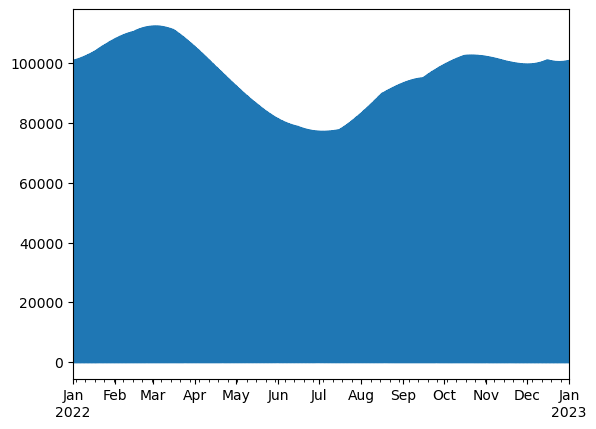

In [272]:
PDC.plot()

In [273]:
ACout = pvlib.inverter.sandia(Vstring, PDC, Inverter)

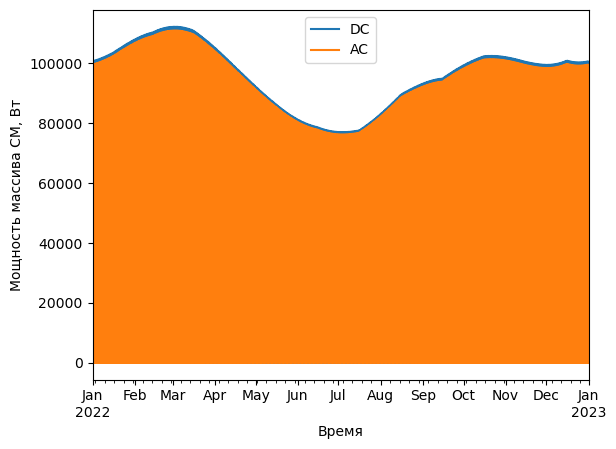

In [274]:
PDC.plot(label = 'DC')
ACout.plot(label = 'AC')
plt.ylabel('Мощность массива СМ, Вт')
plt.xlabel('Время')
plt.legend()


In [275]:
ACout.max()/1000


110.96175742383838

In [276]:
ACout.sum()

229555975.47041014

In [277]:
Ases = 100000


In [278]:
A_PV = PV_lenght * PV_widtht / 1000000
A_PVfull = PV_lenght * (PV_widtht + 1000) / 1000000 # с учётом расстояния между рядами
A_PV

1.987968

In [279]:
A_PVfull

3.971968

In [280]:
nmax_PV = 25176

In [281]:
nmax_inv = nmax_PV * PV_module['STC'] / Inverter['Paco'] # число инверторов = число массивов СМ
nmax_inv

69.03859336665153

In [282]:
nmax_inv = 149

In [283]:
ACfull1 = ACout
ACfull1.max()

110961.75742383838

In [284]:
ACfull1.sum()/1000000

229.55597547041015

Text(0.5, 0, 'Время')

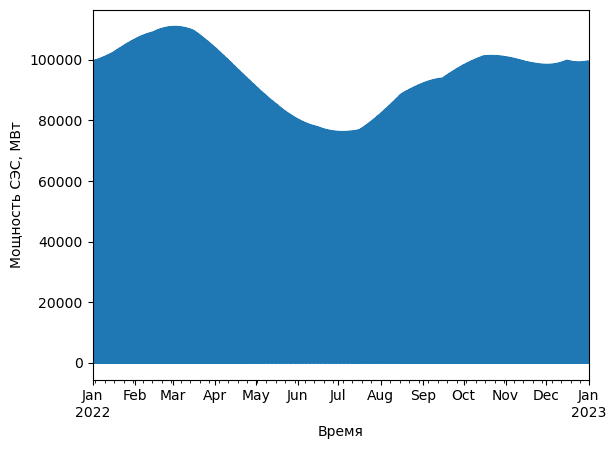

In [285]:
ACfull1.plot()
plt.ylabel('Мощность CЭС, МВт')
plt.xlabel('Время')

In [286]:
KIUM1 = ACfull1.sum() / (8760 * Inverter['Paco'])
KIUM1

0.1889835069980365

In [287]:
# Стринговая схема
Inverters = pvlib.pvsystem.retrieve_sam(path='CEC_Inverters.csv')

Paco_min = 3000
Paco_max = 5000
Vac_min = 240
Vac_max = 480

INVsearch = Inverters.transpose()
INVsearch = INVsearch[(INVsearch['Paco'] >= Paco_min) & (INVsearch['Paco'] <= Paco_max) & (INVsearch['Vac'] >= Vac_min) & (INVsearch['Vac'] <= Vac_max)]
Inverters2 = INVsearch.transpose()
Inverters2

,ABB__PVI_3_0_OUTD_S_US_A__240V_,ABB__PVI_3_0_OUTD_S_US_A__277V_,ABB__PVI_3_0_OUTD_S_US_Z_A__240V_,ABB__PVI_3_0_OUTD_S_US_Z_A__277V_,ABB__PVI_3_0_OUTD_S_US_Z_M_A__240V_,ABB__PVI_3_0_OUTD_S_US_Z_M_A__277V_,ABB__PVI_3_6_OUTD_S_US_A__240V_,ABB__PVI_3_6_OUTD_S_US_A__277V_,ABB__PVI_3_6_OUTD_S_US_Z_A__240V_,ABB__PVI_3_6_OUTD_S_US_Z_A__277V_,...,SolaX_Power_Network_Technology__Zhe_jiang__Co___Ltd___A1_HYB_3_8K_G2__240V_,SolarEdge_Technologies_Ltd___SE3000x__240V_,SolarEdge_Technologies_Ltd___SE3300x__240V_,SolarEdge_Technologies_Ltd___SE3800A_US__240V_,SolarEdge_Technologies_Ltd___SE3800H_US__240V_,SolarEdge_Technologies_Ltd___SE5000x__240V_,Tesla_Inc___1534000_xx_y__240V_,Tigo_Energy___Inc__TSI_3_0K_US__240V_,Tigo_Energy___Inc__TSI_3_8K_US__240V_,Tigo_Energy___Inc__TSI_5_0K_US__240V_
Vac,240,277,240,277,240,277,240,277,240,277,...,240,240,240,240,240,240,240,240,240,240
Pso,16.8813,22.0466,16.8813,22.0466,16.8813,22.0466,22.8129,29.8083,22.8129,29.8083,...,23.0534,14.2174,13.323,11.4887,11.0144,11.9094,27.9577,16.9589,19.9959,21.1886
Paco,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3600.0,3600.0,3600.0,3600.0,...,3805.0,3010.0,3251.0,3790.0,3747.0,4990.0,3800.0,3095.0,3888.0,4943.0
Pdco,3121.67,3106.85,3121.67,3106.85,3121.67,3106.85,3739.76,3724.19,3739.76,3724.19,...,3915.44,3085.35,3340.04,3863.83,3779.2,5089.74,3893.19,3184.22,3987.16,5075.82
Vdco,340.0,390.0,340.0,390.0,340.0,390.0,340.0,395.0,340.0,395.0,...,337.9,388.0,435.0,400.0,395.0,400.0,350.0,380.0,380.0,380.0
C0,-0.000006,-0.000005,-0.000006,-0.000005,-0.000006,-0.000005,-0.000003,-0.000004,-0.000003,-0.000004,...,-0.000003,-0.000003,-0.000003,-0.000001,-0.000001,-0.000001,-0.000006,-0.000004,-0.000003,-0.000003
C1,-0.000021,-0.000033,-0.000021,-0.000033,-0.000021,-0.000033,-0.000018,-0.000035,-0.000018,-0.000035,...,-0.000037,0.000005,0.000022,0.000035,0.000008,0.000022,-0.000048,-0.000038,-0.000042,-0.000047
C2,0.000583,-0.000032,0.000583,-0.000032,0.000583,-0.000032,0.000483,-0.000142,0.000483,-0.000142,...,0.001028,0.000703,0.002977,0.007605,-0.000985,-0.000117,0.000705,-0.000858,-0.000717,-0.000574
C3,-0.000712,-0.00118,-0.000712,-0.00118,-0.000712,-0.00118,0.001023,0.000468,0.001023,0.000468,...,0.00045,-0.000066,0.001897,0.018152,0.001425,-0.00613,-0.001566,-0.001608,-0.000643,-0.000713
Pnt,0.1,0.2,0.1,0.2,0.1,0.2,0.2,0.2,0.2,0.2,...,1.1415,3.39,5.46,1.137,1.1241,2.24,4.664,0.9285,1.1664,1.4829


In [288]:
Inverter = Inverters['SolarEdge_Technologies_Ltd___SE5000x__240V_']
Inverter

Vac                  240
Pso              11.9094
Paco              4990.0
Pdco             5089.74
Vdco               400.0
C0             -0.000001
C1              0.000022
C2             -0.000117
C3              -0.00613
Pnt                 2.24
Vdcmax             480.0
Idcmax           12.7243
Mppt_low           370.0
Mppt_high          480.0
CEC_Date      10/15/2018
CEC_hybrid             N
Name: SolarEdge_Technologies_Ltd___SE5000x__240V_, dtype: object

In [289]:
M = Inverter['Vdcmax'] / DCout['v_oc'].max() # число последовательных СМ
M

10.210824852965036

In [291]:
M = 10

In [292]:
NS = Inverter['Paco'] / (M * PV_module1['STC']) # число параллельных цепочек (массива)
NS

1.2786216509849742

In [293]:
NS = 1

In [294]:
Vstring = M * DCout['v_mp']
Iarray = NS * DCout['i_mp']
PDC = Vstring * Iarray

<AxesSubplot:>

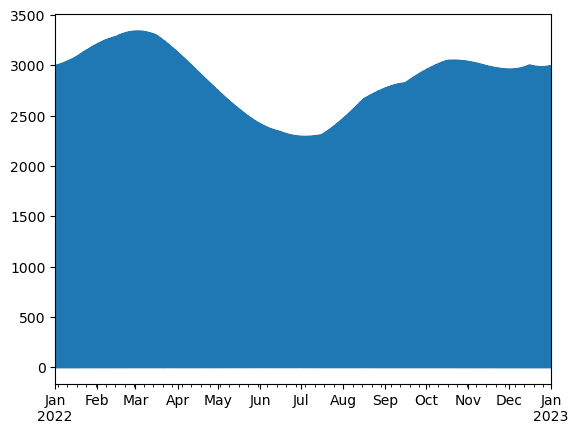

In [295]:
PDC.plot()

In [297]:
ACout = pvlib.inverter.sandia(Vstring, PDC, Inverter)


<AxesSubplot:>

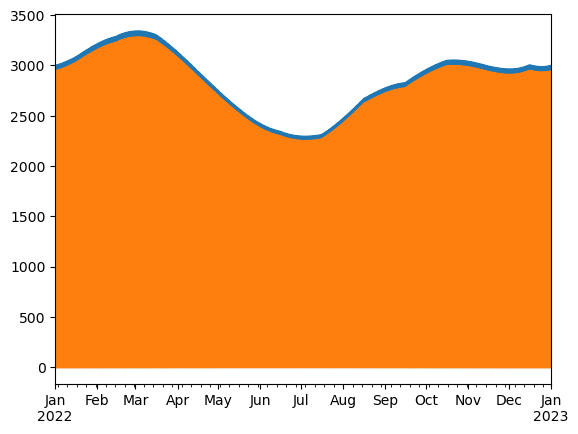

In [298]:
PDC.plot()
ACout.plot()


In [299]:
nmax_inv = nmax_PV * PV_module['STC'] / Inverter['Paco'] # число инверторов = число массивов СМ
nmax_inv


1918.4566076152307

In [300]:
nmax_inv = 37


In [301]:
ACfull2 = ACout * nmax_inv / 1000 # кВт
ACfull2.max()


121.3660412085332

In [302]:
ACfull2.sum()/ 1000 # МВт * ч


249.8643898881732

<AxesSubplot:>

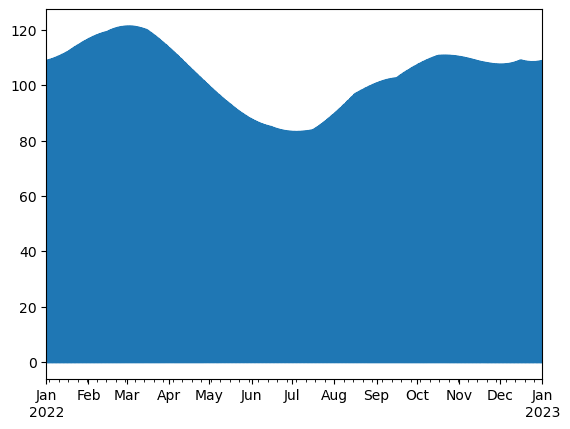

In [303]:
ACfull2.plot()

In [304]:
KIUM2 = ACfull2.sum()*1000 / (8760 * nmax_inv * Inverter['Paco'])
KIUM2

0.15448915224511295

<AxesSubplot:>

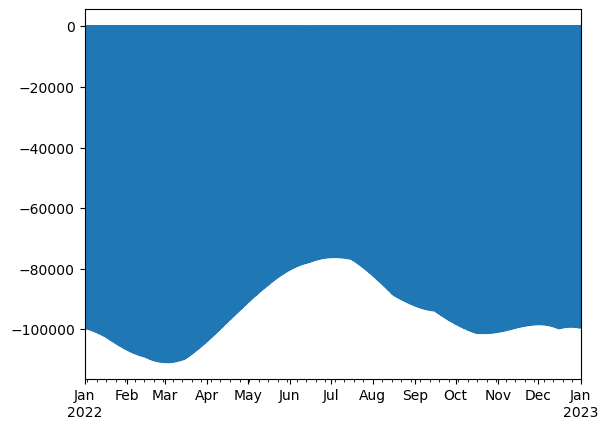

In [305]:
ACfull_dif = ACfull2 - ACfull1
ACfull_dif.plot()